In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Load and clean the data (reusing the cleaning function from data exploration)
def clean_data(df):
    # Convert date columns
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    
    # Calculate vehicle age
    df['VehicleAge'] = pd.to_datetime('now').year - df['RegistrationYear']
    
    # Calculate loss ratio where applicable
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
    
    # Clean categorical variables
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna('Unknown')
        df[col] = df[col].str.strip()
    
    # Clean numerical variables
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = df[col].fillna(df[col].median())
    
    return df

# Read and clean the data
print("Loading data...")
df = pd.read_csv('../MachineLearningRating_v3.txt', sep='|')
df_cleaned = clean_data(df.copy())

print(f"Dataset shape: {df_cleaned.shape}")
print("Data loaded and cleaned successfully!")


Loading data...
Dataset shape: (1000098, 55)
Data loaded and cleaned successfully!


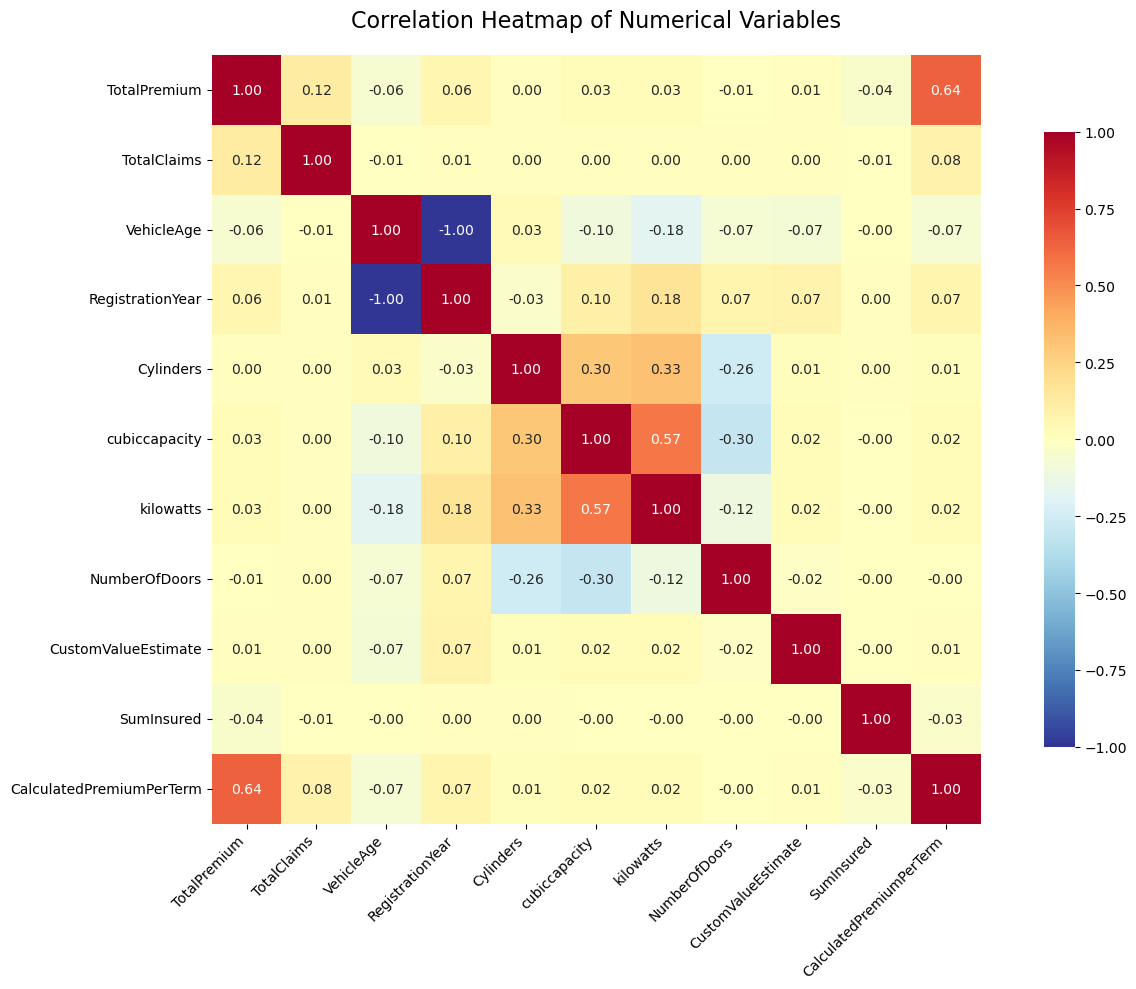

In [11]:
# 1. CORRELATION HEATMAP
# Select numerical columns for correlation analysis
numerical_cols = ['TotalPremium', 'TotalClaims', 'VehicleAge', 'RegistrationYear', 
                 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors',
                 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm']

# Create correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df_cleaned[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


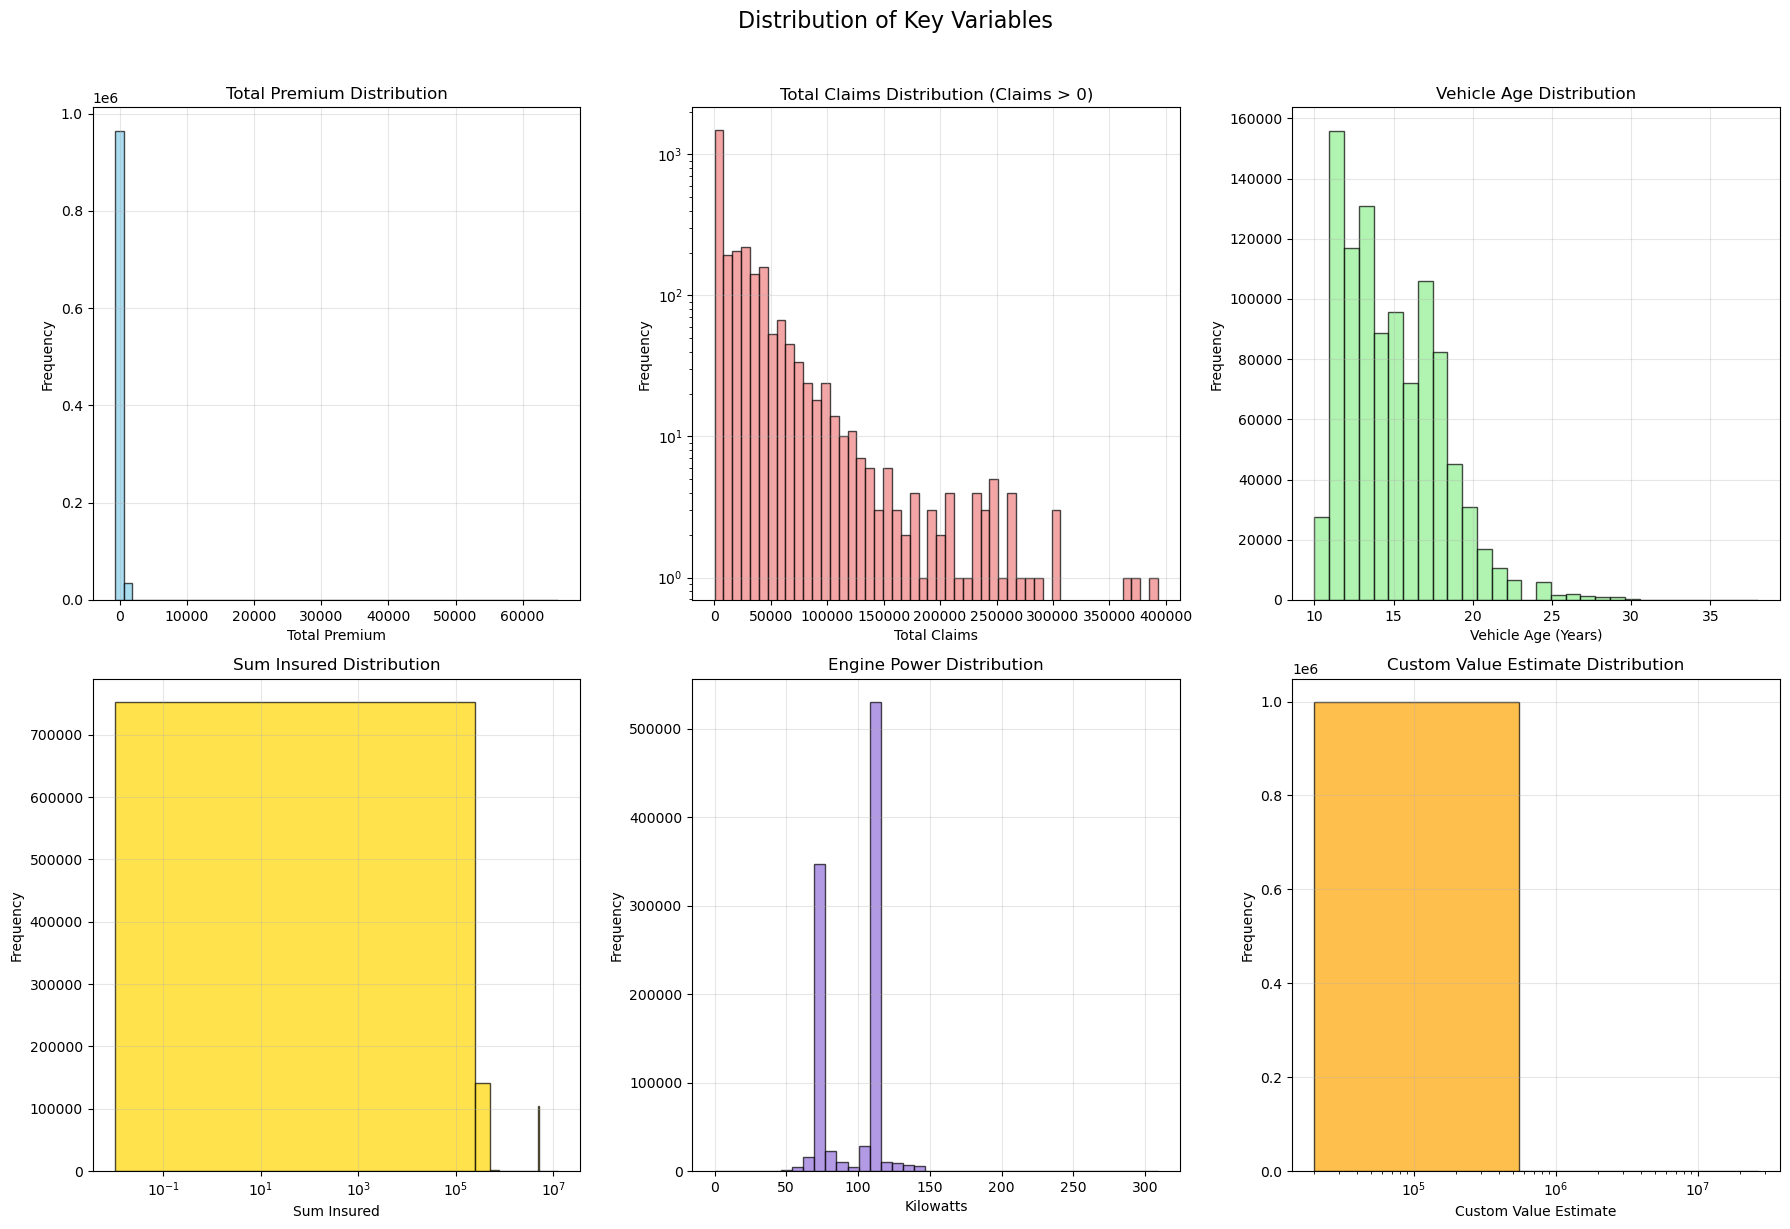

In [17]:
# 2. DISTRIBUTION HISTOGRAMS
# Create subplots for key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Key Variables', fontsize=16, y=1.02)

# TotalPremium distribution
axes[0, 0].hist(df_cleaned['TotalPremium'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Total Premium Distribution')
axes[0, 0].set_xlabel('Total Premium')
axes[0, 0].set_ylabel('Frequency')

# TotalClaims distribution (log scale for better visualization)
claims_positive = df_cleaned[df_cleaned['TotalClaims'] > 0]['TotalClaims']
axes[0, 1].hist(claims_positive, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Total Claims Distribution (Claims > 0)')
axes[0, 1].set_xlabel('Total Claims')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_yscale('log')

# Vehicle Age distribution
axes[0, 2].hist(df_cleaned['VehicleAge'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Vehicle Age Distribution')
axes[0, 2].set_xlabel('Vehicle Age (Years)')
axes[0, 2].set_ylabel('Frequency')

# Sum Insured distribution
axes[1, 0].hist(df_cleaned['SumInsured'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 0].set_title('Sum Insured Distribution')
axes[1, 0].set_xlabel('Sum Insured')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xscale('log')

# Engine Power (kilowatts) distribution
axes[1, 1].hist(df_cleaned['kilowatts'], bins=40, alpha=0.7, color='mediumpurple', edgecolor='black')
axes[1, 1].set_title('Engine Power Distribution')
axes[1, 1].set_xlabel('Kilowatts')
axes[1, 1].set_ylabel('Frequency')

# Custom Value Estimate distribution
custom_values = df_cleaned[df_cleaned['CustomValueEstimate'] > 0]['CustomValueEstimate']
axes[1, 2].hist(custom_values, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 2].set_title('Custom Value Estimate Distribution')
axes[1, 2].set_xlabel('Custom Value Estimate')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_xscale('log')

plt.tight_layout()
plt.show()


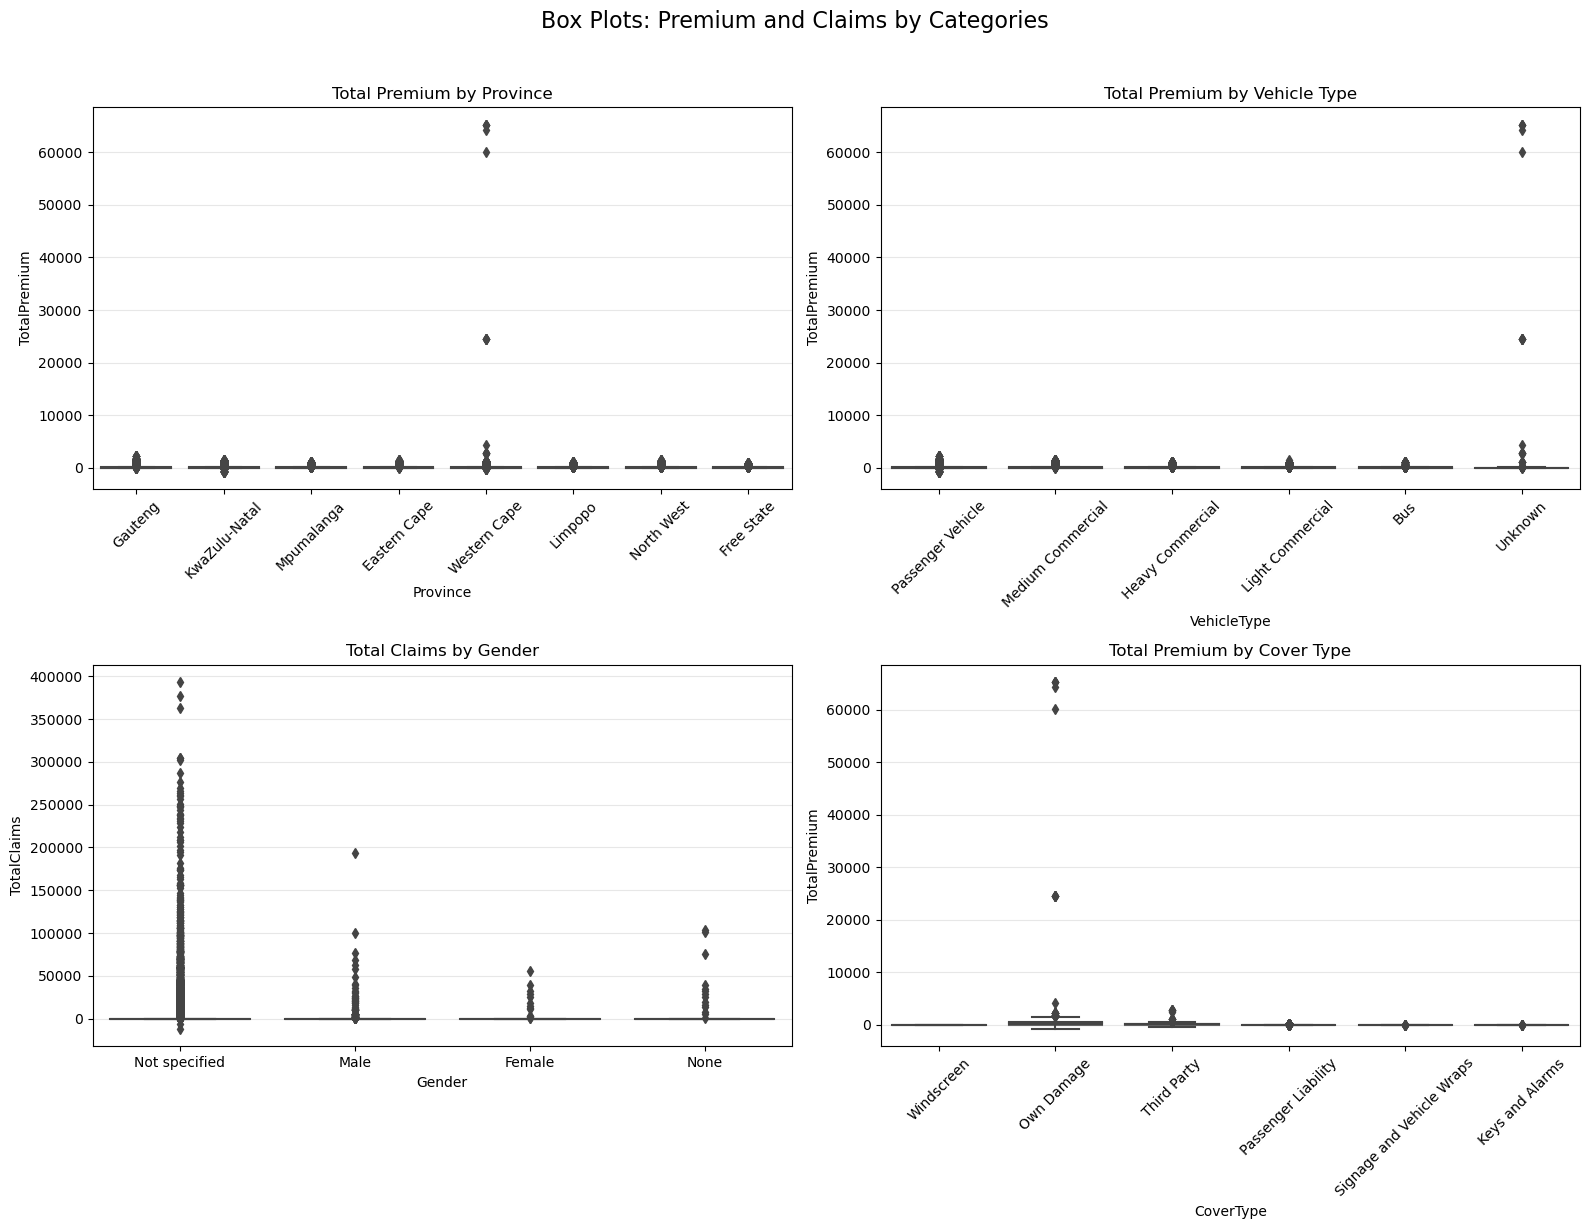

In [24]:
# 3. BOX PLOTS FOR CATEGORICAL ANALYSIS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Box Plots: Premium and Claims by Categories', fontsize=16, y=1.02)

# Premium by Province (top 8 provinces)
top_provinces = df_cleaned['Province'].value_counts().head(8).index
province_data = df_cleaned[df_cleaned['Province'].isin(top_provinces)]
sns.boxplot(data=province_data, x='Province', y='TotalPremium', ax=axes[0, 0])
axes[0, 0].set_title('Total Premium by Province')
axes[0, 0].tick_params(axis='x', rotation=45)

# Premium by Vehicle Type (top 6 types)
top_vehicle_types = df_cleaned['VehicleType'].value_counts().head(6).index
vehicle_data = df_cleaned[df_cleaned['VehicleType'].isin(top_vehicle_types)]
sns.boxplot(data=vehicle_data, x='VehicleType', y='TotalPremium', ax=axes[0, 1])
axes[0, 1].set_title('Total Premium by Vehicle Type')
axes[0, 1].tick_params(axis='x', rotation=45)

# Claims by Gender
sns.boxplot(data=df_cleaned, x='Gender', y='TotalClaims', ax=axes[1, 0])
axes[1, 0].set_title('Total Claims by Gender')

# Premium by Cover Type (top 6 types)
top_cover_types = df_cleaned['CoverType'].value_counts().head(6).index
cover_data = df_cleaned[df_cleaned['CoverType'].isin(top_cover_types)]
sns.boxplot(data=cover_data, x='CoverType', y='TotalPremium', ax=axes[1, 1])
axes[1, 1].set_title('Total Premium by Cover Type')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


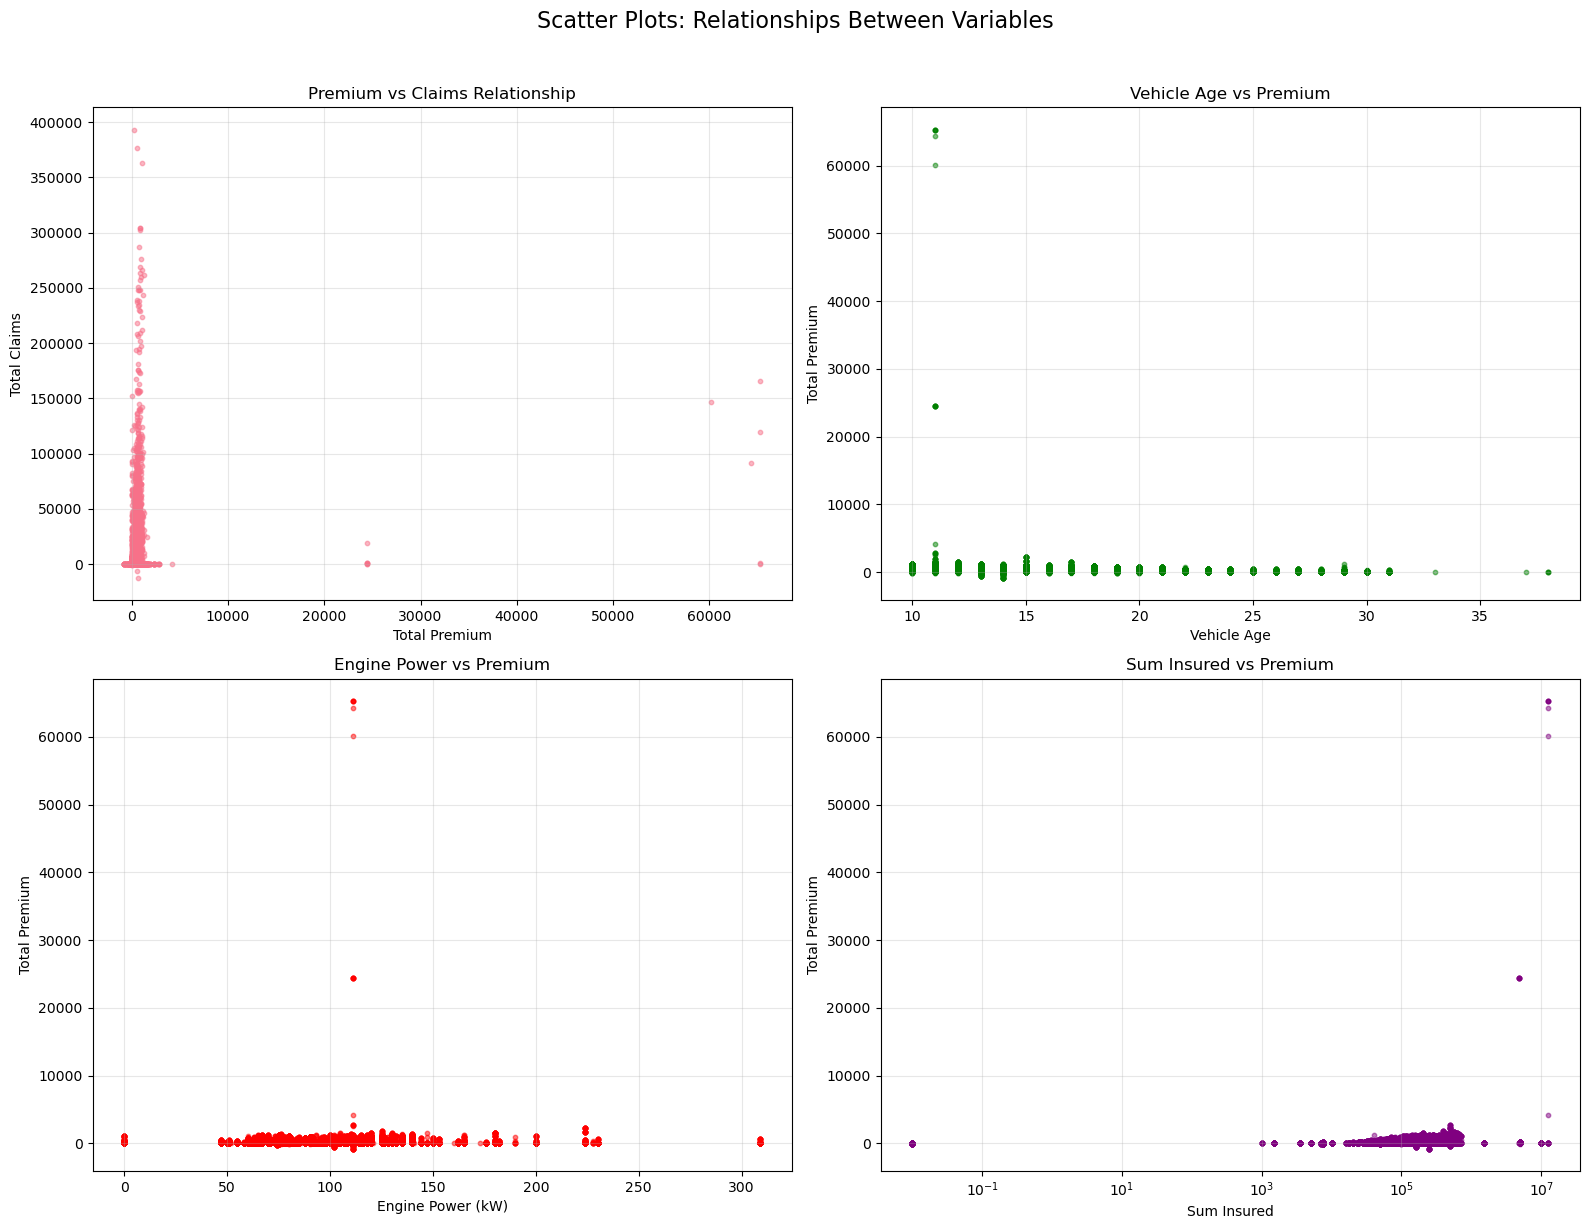

In [30]:
# 4. SCATTER PLOTS FOR RELATIONSHIPS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Scatter Plots: Relationships Between Variables', fontsize=16, y=1.02)

# Premium vs Claims
axes[0, 0].scatter(df_cleaned['TotalPremium'], df_cleaned['TotalClaims'], alpha=0.5, s=10)
axes[0, 0].set_xlabel('Total Premium')
axes[0, 0].set_ylabel('Total Claims')
axes[0, 0].set_title('Premium vs Claims Relationship')

# Vehicle Age vs Premium
axes[0, 1].scatter(df_cleaned['VehicleAge'], df_cleaned['TotalPremium'], alpha=0.5, s=10, color='green')
axes[0, 1].set_xlabel('Vehicle Age')
axes[0, 1].set_ylabel('Total Premium')
axes[0, 1].set_title('Vehicle Age vs Premium')

# Engine Power vs Premium
axes[1, 0].scatter(df_cleaned['kilowatts'], df_cleaned['TotalPremium'], alpha=0.5, s=10, color='red')
axes[1, 0].set_xlabel('Engine Power (kW)')
axes[1, 0].set_ylabel('Total Premium')
axes[1, 0].set_title('Engine Power vs Premium')

# Sum Insured vs Premium
axes[1, 1].scatter(df_cleaned['SumInsured'], df_cleaned['TotalPremium'], alpha=0.5, s=10, color='purple')
axes[1, 1].set_xlabel('Sum Insured')
axes[1, 1].set_ylabel('Total Premium')
axes[1, 1].set_title('Sum Insured vs Premium')
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()


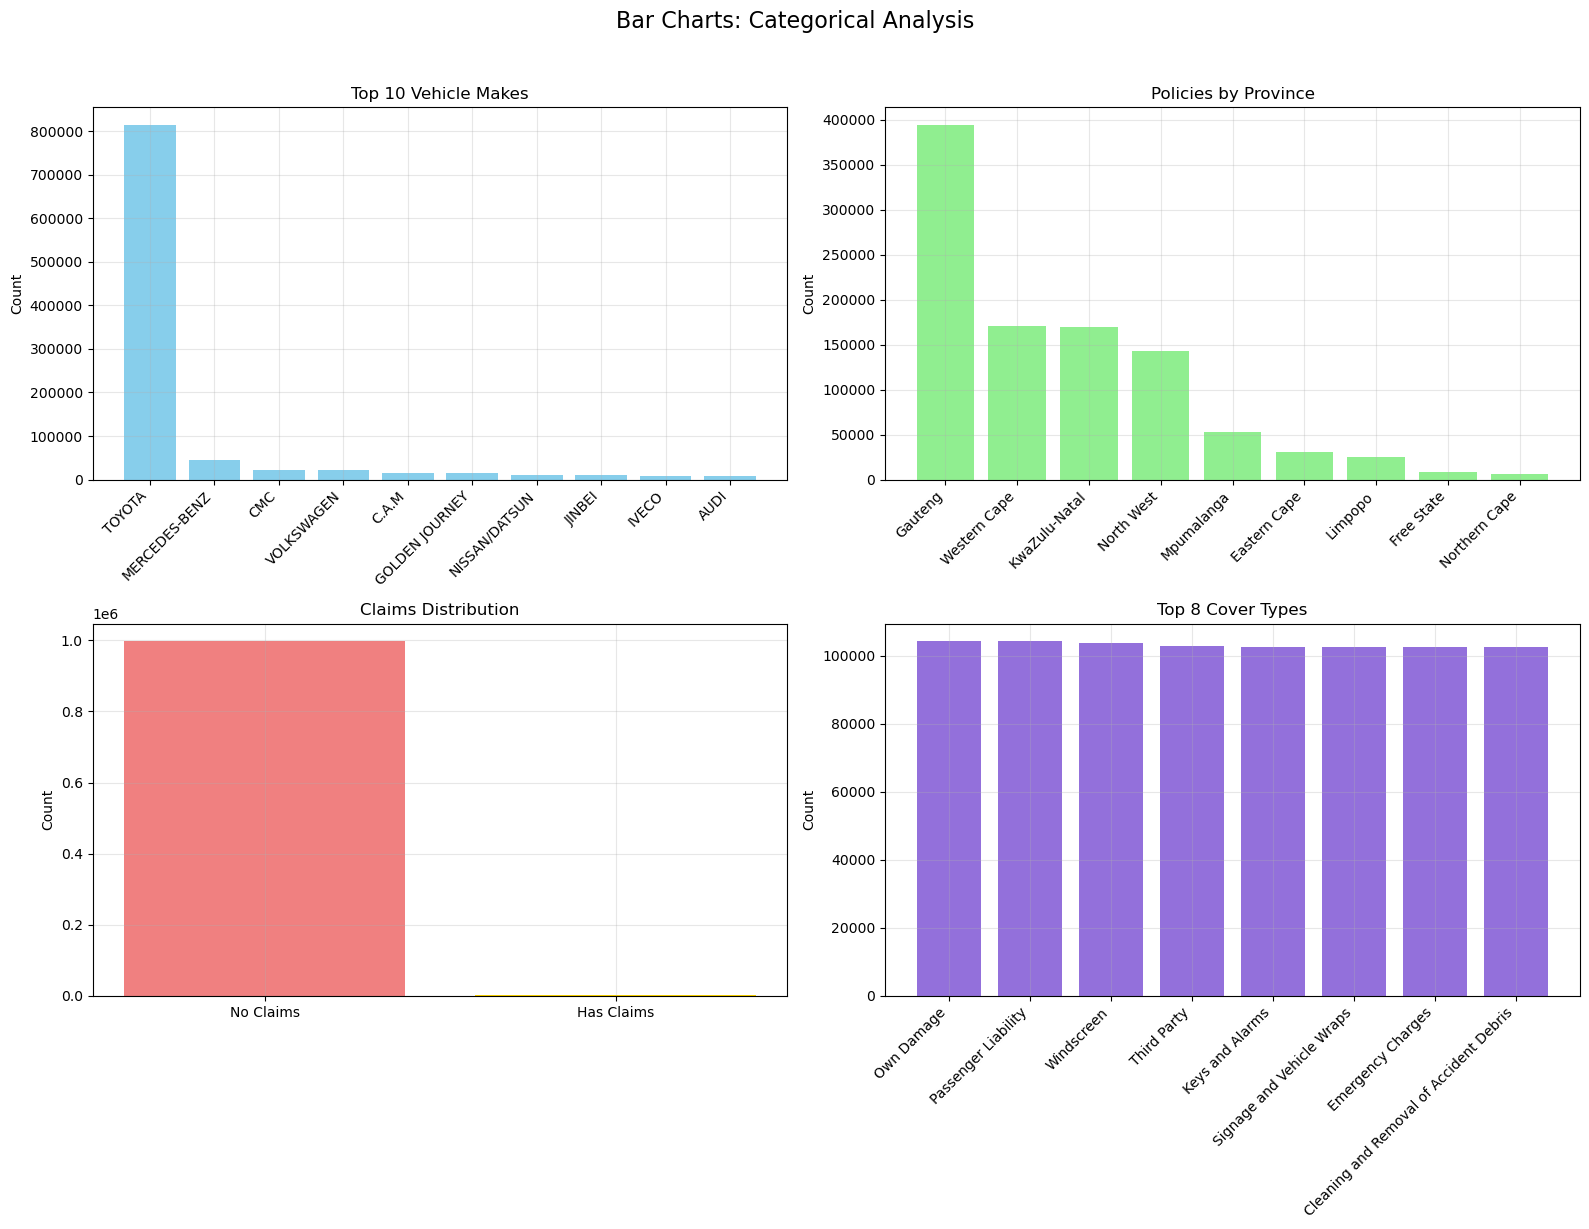

In [33]:
# 5. BAR CHARTS FOR CATEGORICAL DATA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bar Charts: Categorical Analysis', fontsize=16, y=1.02)

# Top 10 Vehicle Makes by count
top_makes = df_cleaned['make'].value_counts().head(10)
axes[0, 0].bar(range(len(top_makes)), top_makes.values, color='skyblue')
axes[0, 0].set_title('Top 10 Vehicle Makes')
axes[0, 0].set_xticks(range(len(top_makes)))
axes[0, 0].set_xticklabels(top_makes.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Count')

# Province distribution
province_counts = df_cleaned['Province'].value_counts()
axes[0, 1].bar(range(len(province_counts)), province_counts.values, color='lightgreen')
axes[0, 1].set_title('Policies by Province')
axes[0, 1].set_xticks(range(len(province_counts)))
axes[0, 1].set_xticklabels(province_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count')

# Claims vs No Claims
claim_counts = df_cleaned['HasClaim'].value_counts()
claim_labels = ['No Claims', 'Has Claims']
axes[1, 0].bar(claim_labels, claim_counts.values, color=['lightcoral', 'gold'])
axes[1, 0].set_title('Claims Distribution')
axes[1, 0].set_ylabel('Count')

# Cover Type distribution (top 8)
cover_counts = df_cleaned['CoverType'].value_counts().head(8)
axes[1, 1].bar(range(len(cover_counts)), cover_counts.values, color='mediumpurple')
axes[1, 1].set_title('Top 8 Cover Types')
axes[1, 1].set_xticks(range(len(cover_counts)))
axes[1, 1].set_xticklabels(cover_counts.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


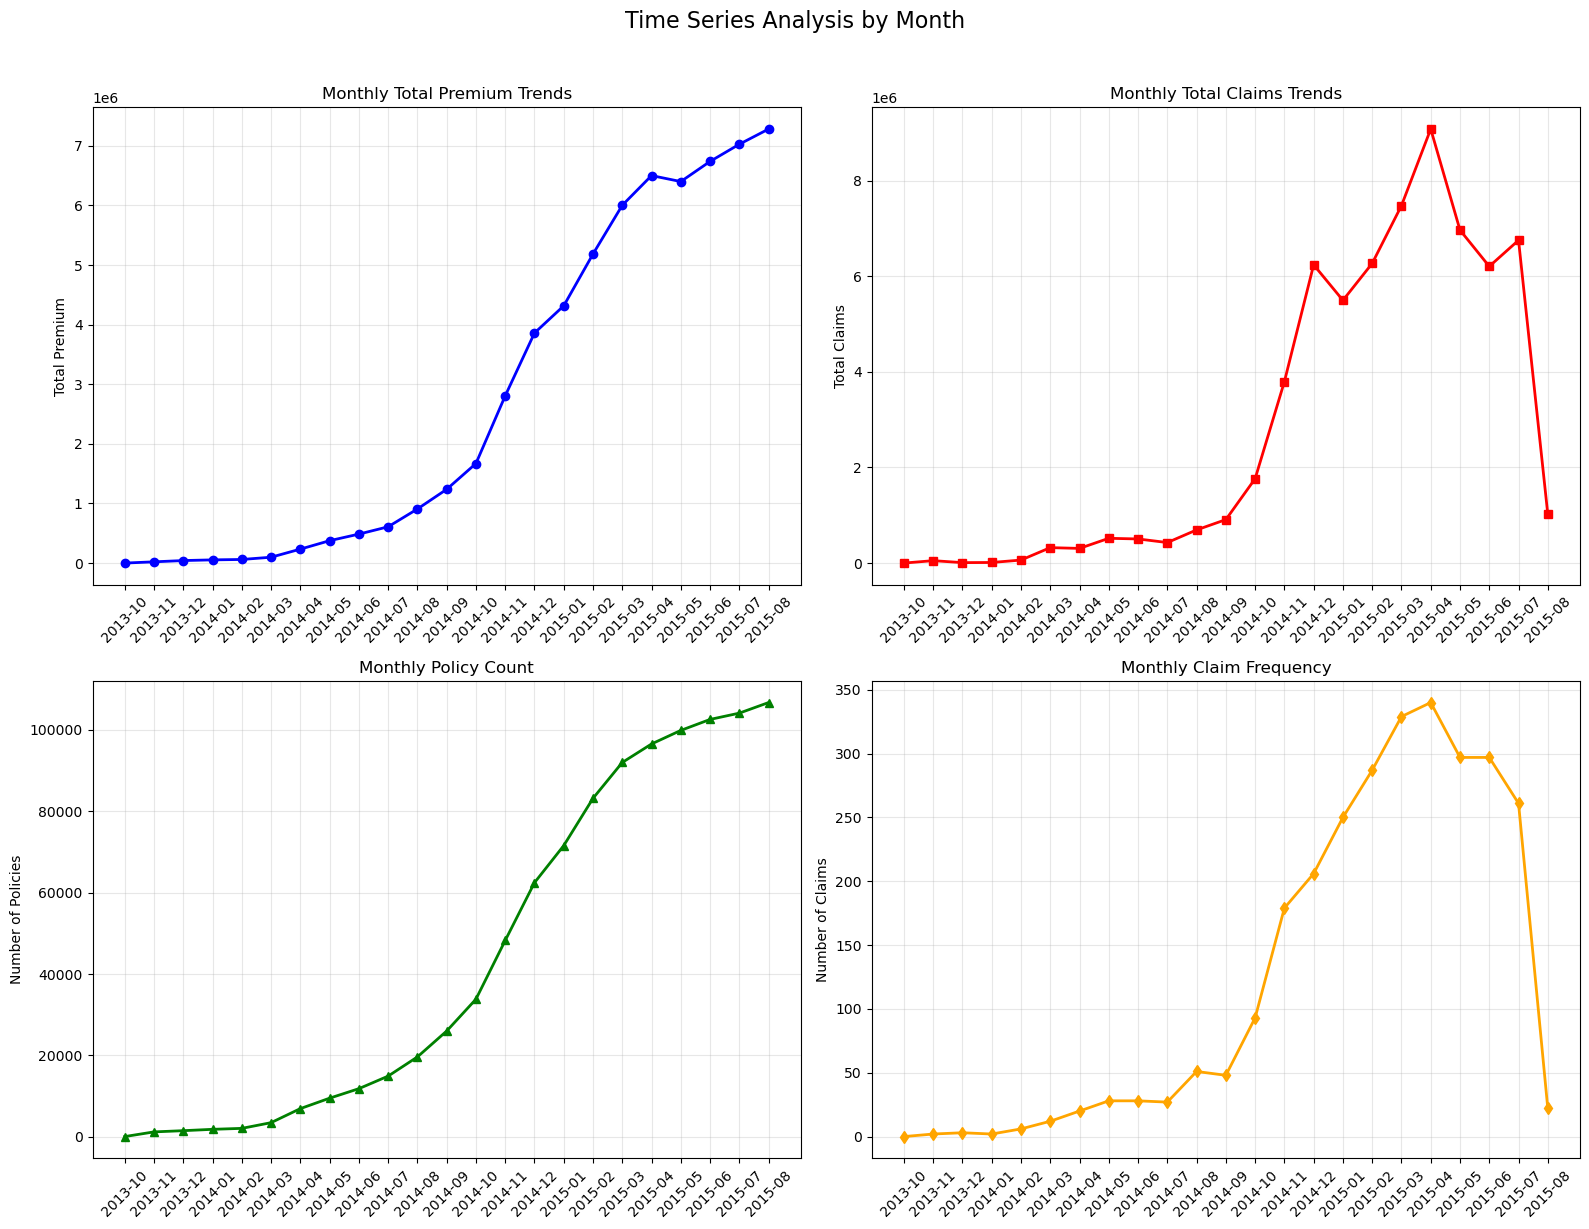

In [37]:
# 6. TIME SERIES ANALYSIS
# Group by transaction month and calculate metrics
monthly_data = df_cleaned.groupby(df_cleaned['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count',
    'HasClaim': 'sum'
}).reset_index()

monthly_data['TransactionMonth'] = monthly_data['TransactionMonth'].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time Series Analysis by Month', fontsize=16, y=1.02)

# Monthly Premium Trends
axes[0, 0].plot(monthly_data['TransactionMonth'], monthly_data['TotalPremium'], 
                marker='o', linewidth=2, color='blue')
axes[0, 0].set_title('Monthly Total Premium Trends')
axes[0, 0].set_ylabel('Total Premium')
axes[0, 0].tick_params(axis='x', rotation=45)

# Monthly Claims Trends
axes[0, 1].plot(monthly_data['TransactionMonth'], monthly_data['TotalClaims'], 
                marker='s', linewidth=2, color='red')
axes[0, 1].set_title('Monthly Total Claims Trends')
axes[0, 1].set_ylabel('Total Claims')
axes[0, 1].tick_params(axis='x', rotation=45)

# Monthly Policy Count
axes[1, 0].plot(monthly_data['TransactionMonth'], monthly_data['PolicyID'], 
                marker='^', linewidth=2, color='green')
axes[1, 0].set_title('Monthly Policy Count')
axes[1, 0].set_ylabel('Number of Policies')
axes[1, 0].tick_params(axis='x', rotation=45)

# Monthly Claim Frequency
axes[1, 1].plot(monthly_data['TransactionMonth'], monthly_data['HasClaim'], 
                marker='d', linewidth=2, color='orange')
axes[1, 1].set_title('Monthly Claim Frequency')
axes[1, 1].set_ylabel('Number of Claims')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1500x1200 with 0 Axes>

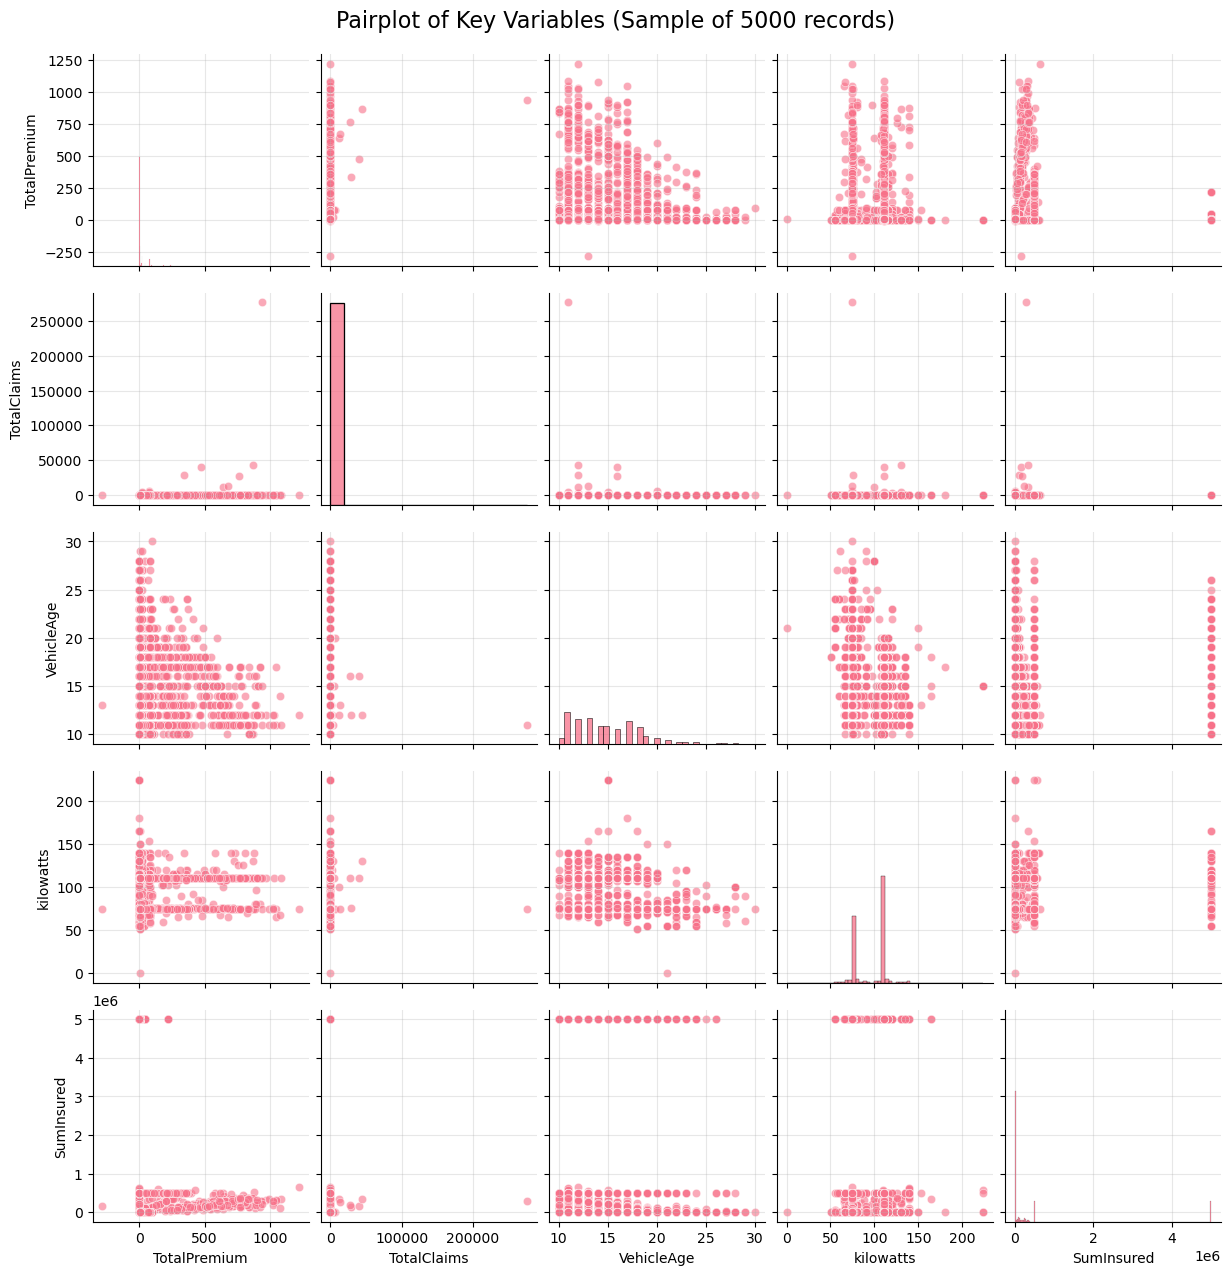

In [40]:
# 7. ADVANCED ANALYSIS: PAIRPLOT FOR KEY VARIABLES
# Select a subset of key variables for pairplot
key_vars = ['TotalPremium', 'TotalClaims', 'VehicleAge', 'kilowatts', 'SumInsured']
subset_data = df_cleaned[key_vars].sample(n=5000, random_state=42)  # Sample for performance

# Create pairplot
plt.figure(figsize=(15, 12))
pair_plot = sns.pairplot(subset_data, diag_kind='hist', plot_kws={'alpha': 0.6})
pair_plot.fig.suptitle('Pairplot of Key Variables (Sample of 5000 records)', y=1.02, fontsize=16)
plt.show()


In [42]:
# 8. SUMMARY STATISTICS AND INSIGHTS
print("=== KEY INSIGHTS FROM MachineLearningRating_v3.txt DATASET ===\n")

# Basic dataset info
print(f"Total Records: {len(df_cleaned):,}")
print(f"Total Policies: {df_cleaned['PolicyID'].nunique():,}")
print(f"Date Range: {df_cleaned['TransactionMonth'].min()} to {df_cleaned['TransactionMonth'].max()}")

# Claims analysis
total_claims = df_cleaned['TotalClaims'].sum()
total_premiums = df_cleaned['TotalPremium'].sum()
claim_ratio = df_cleaned['HasClaim'].mean() * 100

print(f"\n=== FINANCIAL METRICS ===")
print(f"Total Premiums: R{total_premiums:,.2f}")
print(f"Total Claims: R{total_claims:,.2f}")
print(f"Overall Loss Ratio: {(total_claims/total_premiums)*100:.2f}%")
print(f"Claim Frequency: {claim_ratio:.2f}% of policies have claims")

# Vehicle analysis
print(f"\n=== VEHICLE ANALYSIS ===")
print(f"Average Vehicle Age: {df_cleaned['VehicleAge'].mean():.1f} years")
print(f"Most Common Vehicle Make: {df_cleaned['make'].mode().iloc[0]}")
print(f"Most Common Vehicle Type: {df_cleaned['VehicleType'].mode().iloc[0]}")

# Geographic analysis
print(f"\n=== GEOGRAPHIC DISTRIBUTION ===")
print("Top 5 Provinces by Policy Count:")
province_counts = df_cleaned['Province'].value_counts().head(5)
for province, count in province_counts.items():
    percentage = (count / len(df_cleaned)) * 100
    print(f"  {province}: {count:,} policies ({percentage:.1f}%)")

# Risk analysis
print(f"\n=== RISK ANALYSIS ===")
high_risk_threshold = df_cleaned['TotalClaims'].quantile(0.95)
high_risk_policies = (df_cleaned['TotalClaims'] > high_risk_threshold).sum()
print(f"High-risk policies (top 5% claims): {high_risk_policies:,}")

avg_premium_by_age = df_cleaned.groupby('VehicleAge')['TotalPremium'].mean()
print(f"Highest average premium by vehicle age: {avg_premium_by_age.idxmax()} years (R{avg_premium_by_age.max():.2f})")

print(f"\n=== DATA QUALITY ===")
print(f"Missing values handled: Yes")
print(f"Date range coverage: {(df_cleaned['TransactionMonth'].max() - df_cleaned['TransactionMonth'].min()).days} days")
print(f"Unique vehicle makes: {df_cleaned['make'].nunique()}")
print(f"Unique cover types: {df_cleaned['CoverType'].nunique()}")

print("\n" + "="*60)
print("VISUALIZATION ANALYSIS COMPLETE")
print("All charts above provide comprehensive insights into the")
print("MachineLearningRating_v3.txt dataset patterns and relationships.")
print("="*60)


=== KEY INSIGHTS FROM MachineLearningRating_v3.txt DATASET ===

Total Records: 1,000,098
Total Policies: 7,000
Date Range: 2013-10-01 00:00:00 to 2015-08-01 00:00:00

=== FINANCIAL METRICS ===
Total Premiums: R61,911,562.70
Total Claims: R64,867,546.17
Overall Loss Ratio: 104.77%
Claim Frequency: 0.28% of policies have claims

=== VEHICLE ANALYSIS ===
Average Vehicle Age: 14.8 years
Most Common Vehicle Make: TOYOTA
Most Common Vehicle Type: Passenger Vehicle

=== GEOGRAPHIC DISTRIBUTION ===
Top 5 Provinces by Policy Count:
  Gauteng: 393,865 policies (39.4%)
  Western Cape: 170,796 policies (17.1%)
  KwaZulu-Natal: 169,781 policies (17.0%)
  North West: 143,287 policies (14.3%)
  Mpumalanga: 52,718 policies (5.3%)

=== RISK ANALYSIS ===
High-risk policies (top 5% claims): 2,788
Highest average premium by vehicle age: 10 years (R103.15)

=== DATA QUALITY ===
Missing values handled: Yes
Date range coverage: 669 days
Unique vehicle makes: 43
Unique cover types: 22

VISUALIZATION ANALYSIS 